## Imports

In [324]:
import pandas as pd 
import numpy as np
import re
from tqdm.notebook import tqdm_notebook

## Loading dataset

In [497]:
#for working purposes
SAMPLE = False

if SAMPLE:
    n=7552
else: 
    n=None
df = pd.read_csv('../raw_data/train.csv',nrows=n)
print(df.shape)
df.head()

(144293, 8)


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [4]:
## LOOKING FOR AN ID TO TEST
for id in df.id.unique()[:10]:
    display(df[df['id']==id])

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
5,423A1CA112E2,1.622628e+12,887.0,1150.0,That's why there's a thing that's called no te...,Evidence,Evidence 3,163 164 165 166 167 168 169 170 171 172 173 17...
6,423A1CA112E2,1.622628e+12,1151.0,1533.0,Sometimes on the news there is either an accid...,Evidence,Evidence 4,211 212 213 214 215 216 217 218 219 220 221 22...
7,423A1CA112E2,1.622628e+12,1534.0,1602.0,Phones are fine to use and it's also the best ...,Claim,Claim 2,282 283 284 285 286 287 288 289 290 291 292 29...
8,423A1CA112E2,1.622628e+12,1603.0,1890.0,If you go through a problem and you can't find...,Evidence,Evidence 5,297 298 299 300 301 302 303 304 305 306 307 30...
9,423A1CA112E2,1.622628e+12,1891.0,2027.0,The news always updated when people do somethi...,Concluding Statement,Concluding Statement 1,355 356 357 358 359 360 361 362 363 364 365 36...


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
10,A8445CABFECE,1.622576e+12,18.0,85.0,Drivers should not be able to use phones while...,Position,Position 1,3 4 5 6 7 8 9 10 11 12 13 14
11,A8445CABFECE,1.622576e+12,86.0,202.0,Drivers who used their phone while operating a...,Claim,Claim 1,15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 3...
12,A8445CABFECE,1.622576e+12,203.0,1030.0,According to an article by the Edgar Snyder Fi...,Evidence,Evidence 1,36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 5...
13,A8445CABFECE,1.622576e+12,1031.0,1243.0,"In conclusion, drivers should not able to work...",Concluding Statement,Concluding Statement 1,177 178 179 180 181 182 183 184 185 186 187 18...


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
14,6B4F7A0165B9,1.622644e+12,36.0,512.0,The ability to stay connected to people we kno...,Lead,Lead 1,5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 ...
15,6B4F7A0165B9,1.622644e+12,513.0,593.0,"However, this device is taken to areas that i...",Position,Position 1,92 93 94 95 96 97 98 99 100 101 102 103 104
16,6B4F7A0165B9,1.622644e+12,594.0,726.0,Within a vehicle capable of traveling upwards ...,Claim,Claim 1,105 106 107 108 109 110 111 112 113 114 115 11...
17,6B4F7A0165B9,1.622644e+12,727.0,1244.0,The most common of these distractions is a cel...,Evidence,Evidence 1,125 126 127 128 129 130 131 132 133 134 135 13...
18,6B4F7A0165B9,1.622644e+12,1245.0,1439.0,Conversely people may believe that laws in pre...,Counterclaim,Counterclaim 1,221 222 223 224 225 226 227 228 229 230 231 23...
19,6B4F7A0165B9,1.622644e+12,1440.0,1681.0,The problem becomes apparent that this is a se...,Rebuttal,Rebuttal 1,254 255 256 257 258 259 260 261 262 263 264 26...
20,6B4F7A0165B9,1.622644e+12,1682.0,1906.0,The creation of telecommunication devices was ...,Concluding Statement,Concluding Statement 1,296 297 298 299 300 301 302 303 304 305 306 30...


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
21,E05C7F5C1156,1.622838e+12,0.0,455.0,People are debating whether if drivers should ...,Lead,Lead 1,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
22,E05C7F5C1156,1.622838e+12,455.0,527.0,I also think that you shouldn't use your phone...,Position,Position 1,77 78 79 80 81 82 83 84 85 86 87 88 89
23,E05C7F5C1156,1.622838e+12,528.0,568.0,because it can cause vehicle collisions,Claim,Claim 1,90 91 92 93 94 95
24,E05C7F5C1156,1.622838e+12,569.0,588.0,"slow reaction time,",Claim,Claim 2,96 97 98
25,E05C7F5C1156,1.622838e+12,589.0,609.0,and fatal injuries.,Claim,Claim 3,99 100 101
26,E05C7F5C1156,1.622838e+12,782.0,937.0,\nThe first reason why the use of cell phones ...,Claim,Claim 4,133 134 135 136 137 138 139 140 141 142 143 14...
27,E05C7F5C1156,1.622838e+12,937.0,1403.0,Most vehicle collisions happen when the drive...,Evidence,Evidence 1,158 159 160 161 162 163 164 165 166 167 168 16...
28,E05C7F5C1156,1.622838e+12,1404.0,1506.0,The second reason why you shouldn't operate a ...,Claim,Claim 5,234 235 236 237 238 239 240 241 242 243 244 24...
29,E05C7F5C1156,1.622838e+12,1507.0,2042.0,Reaction time is the measure of how quickly an...,Evidence,Evidence 2,251 252 253 254 255 256 257 258 259 260 261 26...
30,E05C7F5C1156,1.622838e+12,2043.0,2188.0,The last reason you shouldn't drive while usin...,Claim,Claim 6,345 346 347 348 349 350 351 352 353 354 355 35...


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
33,50B3435E475B,1.622645e+12,21.0,379.0,Over half of drivers in today's society have t...,Lead,Lead 1,3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20...
34,50B3435E475B,1.622645e+12,380.0,460.0,I strongly feel that texting and driving is da...,Position,Position 1,63 64 65 66 67 68 69 70 71 72 73 74 75
35,50B3435E475B,1.622645e+12,461.0,540.0,"Diving more into detail, texting and driving i...",Claim,Claim 1,76 77 78 79 80 81 82 83 84 85 86 87
36,50B3435E475B,1.622645e+12,541.0,954.0,Just imagine you're on the road driving to you...,Evidence,Evidence 1,88 89 90 91 92 93 94 95 96 97 98 99 100 101 10...
37,50B3435E475B,1.622645e+12,955.0,1051.0,The cost of a life shouldn't be worth a text m...,Claim,Claim 2,162 163 164 165 166 167 168 169 170 171 172 17...
38,50B3435E475B,1.622645e+12,1052.0,1529.0,Texting and driving has taken many lives. In a...,Evidence,Evidence 2,179 180 181 182 183 184 185 186 187 188 189 19...
39,50B3435E475B,1.622645e+12,1530.0,1603.0,Luckily the government has enforced a brand ne...,Claim,Claim 3,260 261 262 263 264 265 266 267 268 269 270 271
40,50B3435E475B,1.622645e+12,1604.0,1913.0,This law states Drivers cannot have a phone in...,Evidence,Evidence 3,272 273 274 275 276 277 278 279 280 281 282 28...
41,50B3435E475B,1.622645e+12,1914.0,2047.0,"Over all texting and driving is dangerous, has...",Concluding Statement,Concluding Statement 1,328 329 330 331 332 333 334 335 336 337 338 33...


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
42,DBF7EB6A9E02,1.622489e+12,52.0,200.0,Being on your device and driving could be an o...,Lead,Lead 1,9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24...
43,DBF7EB6A9E02,1.622489e+12,200.0,244.0,It could lead to accidents and altercations.,Claim,Claim 1,35 36 37 38 39 40 41
44,DBF7EB6A9E02,1.622489e+12,245.0,294.0,In addition it would even cost you your licences.,Claim,Claim 2,42 43 44 45 46 47 48 49 50
45,DBF7EB6A9E02,1.622490e+12,295.0,334.0,The most detrimental outcome is death.,Claim,Claim 3,51 52 53 54 55 56
46,DBF7EB6A9E02,1.622489e+12,418.0,515.0,. Drivers should not be able to use cell phone...,Position,Position 1,73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 8...
47,DBF7EB6A9E02,1.622489e+12,516.0,590.0,One leading cause to motor vehicle accidents i...,Claim,Claim 4,90 91 92 93 94 95 96 97 98 99 100 101 102
48,DBF7EB6A9E02,1.622490e+12,590.0,1152.0,It could lead to accidents and altercations. Y...,Evidence,Evidence 1,103 104 105 106 107 108 109 110 111 112 113 11...
49,DBF7EB6A9E02,1.622490e+12,1162.0,1219.0,another consequence could be having your lice...,Claim,Claim 5,206 207 208 209 210 211 212 213
50,DBF7EB6A9E02,1.622490e+12,1220.0,1706.0,When you have violated a driving law there wil...,Evidence,Evidence 2,214 215 216 217 218 219 220 221 222 223 224 22...
51,DBF7EB6A9E02,1.622490e+12,1718.0,1842.0,there is another cause to driving while being ...,Claim,Claim 6,304 305 306 307 308 309 310 311 312 313 314 31...


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
54,810B70E80E1D,1.622657e+12,24.0,86.0,I believe that drivers shouldn't use cell phon...,Position,Position 1,4 5 6 7 8 9 10 11 12 13
55,810B70E80E1D,1.622657e+12,95.0,287.0,it is an attention hazzard. Driving with your ...,Claim,Claim 1,15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 3...
56,810B70E80E1D,1.622657e+12,295.0,368.0,there are apps and programs on the phones that...,Claim,Claim 2,51 52 53 54 55 56 57 58 59 60 61 62 63 64
57,810B70E80E1D,1.622657e+12,546.0,681.0,"First and foremost, Driving without the phone ...",Claim,Claim 3,95 96 97 98 99 100 101 102 103 104 105 106 107...
58,810B70E80E1D,1.622657e+12,682.0,1008.0,Not only will it save you life and everyone el...,Evidence,Evidence 1,115 116 117 118 119 120 121 122 123 124 125 12...
59,810B70E80E1D,1.622657e+12,1009.0,1358.0,"Furthermore, Driving while distracted can sign...",Evidence,Evidence 2,170 171 172 173 174 175 176 177 178 179 180 18...
60,810B70E80E1D,1.622657e+12,1359.0,1479.0,"Finally, There are various things that have be...",Claim,Claim 4,229 230 231 232 233 234 235 236 237 238 239 24...
61,810B70E80E1D,1.622657e+12,1480.0,1944.0,For example apps and programs on the phones t...,Evidence,Evidence 3,250 251 252 253 254 255 256 257 258 259 260 26...
62,810B70E80E1D,1.622657e+12,1945.0,2577.0,"In conclusion, Drivers shouldn't drive while u...",Concluding Statement,Concluding Statement 1,329 330 331 332 333 334 335 336 337 338 339 34...


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
63,CE98789F502B,1.622732e+12,0.0,429.0,Although cell phones have been around for quit...,Lead,Lead 1,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
64,CE98789F502B,1.622732e+12,429.0,543.0,Using cellphones while driving can be extremel...,Position,Position 1,78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 9...
65,CE98789F502B,1.622732e+12,544.0,724.0,When we are driving it can be exceedingly diff...,Claim,Claim 1,96 97 98 99 100 101 102 103 104 105 106 107 10...
66,CE98789F502B,1.622732e+12,725.0,1332.0,Other drivers take notice when drivers are on ...,Evidence,Evidence 1,129 130 131 132 133 134 135 136 137 138 139 14...
67,CE98789F502B,1.622732e+12,1333.0,1498.0,Everyday people die in car accidents because w...,Claim,Claim 2,240 241 242 243 244 245 246 247 248 249 250 25...
68,CE98789F502B,1.622732e+12,1498.0,1869.0,Research shows that being on your phone while ...,Evidence,Evidence 2,266 267 268 269 270 271 272 273 274 275 276 27...
69,CE98789F502B,1.622732e+12,1870.0,2534.0,Driving with cell phones should be banned beca...,Evidence,Evidence 3,336 337 338 339 340 341 342 343 344 345 346 34...
70,CE98789F502B,1.622732e+12,2535.0,3002.0,"In conclusion, people should stop texting and ...",Concluding Statement,Concluding Statement 1,446 447 448 449 450 451 452 453 454 455 456 45...


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
71,A97DE0D49AEA,1.622645e+12,63.0,129.0,Driver's should desist from using their Cell ...,Position,Position 1,11 12 13 14 15 16 17 18 19 20
72,A97DE0D49AEA,1.622645e+12,129.0,251.0,Hundreds of research indicate that using the c...,Claim,Claim 1,21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 3...
73,A97DE0D49AEA,1.622645e+12,252.0,1029.0,"Statistically, 50 minutes of phone chatter whi...",Evidence,Evidence 1,41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 5...
74,A97DE0D49AEA,1.622645e+12,1030.0,1160.0,One major issue concerns the risk of using one...,Claim,Claim 2,166 167 168 169 170 171 172 173 174 175 176 17...
75,A97DE0D49AEA,1.622645e+12,1161.0,1349.0,"According to Crundall (2017), the majority of ...",Evidence,Evidence 2,189 190 191 192 193 194 195 196 197 198 199 20...
76,A97DE0D49AEA,1.622645e+12,1350.0,1498.0,Another issue involves the act of conversation...,Claim,Claim 3,219 220 221 222 223 224 225 226 227 228 229 23...
77,A97DE0D49AEA,1.622645e+12,1512.0,1843.0,Scientists from Carnegie Mellon University con...,Evidence,Evidence 3,245 246 247 248 249 250 251 252 253 254 255 25...
78,A97DE0D49AEA,1.622645e+12,1859.0,1946.0,"a driver, under no circumstances, is required ...",Concluding Statement,Concluding Statement 1,294 295 296 297 298 299 300 301 302 303 304 30...


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
79,48D3F4243F0F,1.622732e+12,0.0,778.0,Cell phones were presented within the United S...,Lead,Lead 1,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
80,48D3F4243F0F,1.622732e+12,779.0,999.0,in spite of the fact that utilizing cell phone...,Position,Position 1,120 121 122 123 124 125 126 127 128 129 130 13...
81,48D3F4243F0F,1.622732e+12,1000.0,1117.0,In case drivers on cell phones have more misch...,Claim,Claim 1,154 155 156 157 158 159 160 161 162 163 164 16...
82,48D3F4243F0F,1.622732e+12,1118.0,1350.0,Drivers on cell phones do have more mishaps. H...,Evidence,Evidence 1,174 175 176 177 178 179 180 181 182 183 184 18...
83,48D3F4243F0F,1.622732e+12,1351.0,1466.0,A few investigations recommend that talking on...,Claim,Claim 2,211 212 213 214 215 216 217 218 219 220 221 22...
84,48D3F4243F0F,1.622732e+12,1467.0,1672.0,"In reality, a ponder at the College of Utah th...",Evidence,Evidence 2,229 230 231 232 233 234 235 236 237 238 239 24...


In [5]:
ID_TO_TEST='DBF7EB6A9E02'

### Tests probably useless

In [98]:
array_labels=np.array(df.discourse_type[df.id==ID_TO_TEST])
array_position=np.array(df.predictionstring[df.id==ID_TO_TEST])

In [109]:
_=np.array([df[df.id==ID_TO_TEST].discourse_text.str.replace('\n',' ',regex=True).str.replace('.','',regex=True),df[df.id==ID_TO_TEST].discourse_type]).T

In [116]:
' '.join(_[:,0])

'Being on your device and driving could be an overly dangerous choice in life Many people around the world are injured by this situation every day  It could lead to accidents and altercations In addition it would even cost you your licences The most detrimental outcome is death   Drivers should not be able to use cell phones in any capacity while operating a motor vehicle  One leading cause to motor vehicle accidents is being on your cell phone  It could lead to accidents and altercations Yourself and the passengers are more at risk to bodily injuries and harm These bodily injuries and harm can range anywhere from mild to critical condition In an motor vehicle accident there is more than one involved There is another person or group of people that could have the exact same conditions than the driver on the cell phone In an example of an altercations you could be more prone to damaging an building or such An direct result of an event in place; a fee or very large payment would need to b

In [121]:
_[0,0]

'Being on your device and driving could be an overly dangerous choice in life Many people around the world are injured by this situation every day '

In [124]:
_[:,0].ndim

1

In [134]:

mylen = np.vectorize(lambda text : len(text.split(' ')))

In [141]:
(_[:,1]+' ')*mylen(_)[:,0]

array(['Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead Lead ',
       'Claim Claim Claim Claim Claim Claim Claim ',
       'Claim Claim Claim Claim Claim Claim Claim Claim Claim ',
       'Claim Claim Claim Claim Claim Claim Claim ',
       'Position Position Position Position Position Position Position Position Position Position Position Position Position Position Position Position Position Position Position ',
       'Claim Claim Claim Claim Claim Claim Claim Claim Claim Claim Claim Claim Claim Claim ',
       'Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Evidence Ev

In [143]:
' '.join(_[:,0].split(' '))

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [148]:
mysplitter=np.vectorize(lambda text : str(text.split(' ')))

In [150]:
_

array([['Being on your device and driving could be an overly dangerous choice in life Many people around the world are injured by this situation every day ',
        'Lead'],
       ['It could lead to accidents and altercations', 'Claim'],
       ['In addition it would even cost you your licences', 'Claim'],
       ['The most detrimental outcome is death ', 'Claim'],
       [' Drivers should not be able to use cell phones in any capacity while operating a motor vehicle ',
        'Position'],
       ['One leading cause to motor vehicle accidents is being on your cell phone ',
        'Claim'],
       ['It could lead to accidents and altercations Yourself and the passengers are more at risk to bodily injuries and harm These bodily injuries and harm can range anywhere from mild to critical condition In an motor vehicle accident there is more than one involved There is another person or group of people that could have the exact same conditions than the driver on the cell phone In an examp

### Resume

In [158]:
import typing

In [162]:
InputIds = typing.TypeVar("InputIds", bound=typing.List[int])
AttentionMask = typing.TypeVar("AttentionMask", bound=typing.List[int])
Labels = typing.TypeVar("Labels", bound=typing.List[int])

Output = typing.NamedTuple(
        "Output",
        [
            ("input_ids", InputIds),
            ("attention_mask", AttentionMask),
            ("labels", Labels),
        ],
    )

In [165]:
InputIds

~InputIds

In [168]:
ha=Output(
            input_ids=np.zeros((2, 10), dtype="int32"),
            attention_mask=np.zeros((2, 10), dtype="int32"),
            labels=np.zeros((2, 10, 2 * len([1,2,3]) + 1), dtype="int32"),
        )

In [173]:
ha[2]

array([[[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]], dtype=int32)

In [174]:
df

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
...,...,...,...,...,...,...,...,...
7547,E821935D8F15,1.622565e+12,2439.0,2492.0,"It is a way of ""smart planing"" ourself as a co...",Evidence,Evidence 2,468 469 470 471 472 473 474 475 476 477 478
7548,E821935D8F15,1.622565e+12,2493.0,2557.0,We can live a more free caring world without ...,Claim,Claim 5,479 480 481 482 483 484 485 486 487 488 489 49...
7549,E821935D8F15,1.622565e+12,2558.0,2837.0,Technology can play a part in the limit of of ...,Evidence,Evidence 3,493 494 495 496 497 498 499 500 501 502 503 50...
7550,E821935D8F15,1.622565e+12,2838.0,2945.0,"Another, advantage that we have in hand is the...",Claim,Claim 6,541 542 543 544 545 546 547 548 549 550 551 55...


In [183]:
from transformers import BertTokenizerFast

In [185]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [201]:
tokenizer(['Hello I am Arthur','I want to eat a pizza with cheese'],return_offsets_mapping=True,)

{'input_ids': [[101, 7592, 1045, 2572, 4300, 102], [101, 1045, 2215, 2000, 4521, 1037, 10733, 2007, 8808, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'offset_mapping': [[(0, 0), (0, 5), (6, 7), (8, 10), (11, 17), (0, 0)], [(0, 0), (0, 1), (2, 6), (7, 9), (10, 13), (14, 15), (16, 21), (22, 26), (27, 33), (0, 0)]]}

In [207]:
quote="hello i want to eat a vegetarian pizza and a MILF"
encoding=tokenizer(quote,return_offsets_mapping=True)
pd.DataFrame(
    {"token": [quote[x[0] : x[1]] for x in encoding["offset_mapping"]]},
    index=pd.Index(encoding["input_ids"], name="token_id"),
)


,token
token_id,
101,
7592,hello
1045,i
2215,want
2000,to
4521,eat
1037,a
23566,vegetarian
10733,pizza


In [211]:
arr=np.array(pd.Series([1,1,0,0,0,1,2,2,2]))

In [222]:
labels=np.zeros((arr.size,arr.max()+1))

In [223]:
labels

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [217]:
labels[np.arange(arr.size),arr]=1

In [218]:
labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [219]:
np.arange(arr.size)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [228]:
labels[np.arange(arr.size),arr]=1

In [229]:
labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## Utils functions

In [7]:
## function to transform an essay into a list of words
def essay_to_list(text):
    words = text.replace('\n',' ').replace('.','').split(' ')
    words = np.array(list(filter(('').__ne__,words)))
    return words

In [8]:
## function to transform all discourses from an essay into a list of words
def discourses_to_list(id_):
    words=' '.join(df[df.id==id_].discourse_text.str.replace('\n',' ',regex=True).str.replace('.','',regex=True)).split(' ')
    words = np.array(list(filter(('').__ne__,words)))
    words = np.array(list(filter(('.').__ne__,words)))
    return words

In [9]:
discourses_to_compare = discourses_to_list(ID_TO_TEST)
essay_to_compare = essay_to_list(get_essay(ID_TO_TEST))

In [9]:
## FOR AN ESSAY, COMPARE LIST OF THE FULL TEXT AND THE CONCAT OF THE TRAINING DATASET
## return list of all the words + token_position list + label
def compare(essay,discourses):
    discourses_appended=discourses.copy()
    for index,word in enumerate(essay):
        #print(word==discourses_appended[index],index)
        #print(f'essay: {word} vs discourse: {discourses_appended[index]}')
        if word != discourses_appended[index]:
            discourses_appended=np.insert(discourses_appended,index,word)
    return discourses_appended

In [10]:
result=compare(essay_to_compare,discourses_to_compare)

In [11]:
(result == essay_to_compare).all()

True

## Gap function

In [496]:
# for testing use cases
df_test = df[df.id==ID_TO_TEST].copy()

**PSEUDO CODE** 


- [x] flag the missing discourses ---> flag_gaps function
- [x] create rows with discourse_start and end 
- [x] function applied to a unique ID and slice the text , apply only on none type , add discourse_type
- [x] add discourse_id
- [x] add discourse_type_num
- [x] add predictionstring

In [498]:
def flag_gaps(df,return_filtered=False):
    """
    Add 2 new columns to the df passed : next_start and gap_flag
    
    next_start : char position of the next discourse
    gap_flag : 1 if the next discourse is missing i.e. next_start and discourse_start of the next
    row does not match
    
    if return_filtered = True, returns only the rows where gap_flag=1
    """
    df['next_start']=df['discourse_start'].shift(-1)
    df['next_predictionstring']=df['predictionstring'].shift(-1)
    df['gap_flag']=np.where(df['next_start']-df['discourse_end']>3,1,0)
    
    if return_filtered:
        return df[df['gap_flag']==1]
    
    return None

In [499]:
## Create missing discourses for a single essay
def row_creator(df_filtered):
    """
    Returns a DF with missing discourses to be labeled as None. 
    Must be passed a filtered DF where each row flags a gap. 
    This function works at single doc-ID level.
    """

    start_new = df_filtered['discourse_end'] + 1
    end_new = df_filtered['next_start'] - 1
    
    start_new.reset_index(drop=True,inplace=True)
    end_new.reset_index(drop=True,inplace=True)
    
    #import ipdb ; ipdb.set_trace()
    
    predictionstring_start = df_filtered['predictionstring']\
                            .apply(lambda string : int(string.split()[-1])+1)
    predictionstring_end = df_filtered['next_predictionstring']\
                            .apply(lambda string : int(string.split()[0])-1)
    
    f = np.vectorize(lambda a,b : ' '.join(list(map(str,range(a,b+1)))),otypes=[str])
    
    predictionstring= f(predictionstring_start,predictionstring_end)
    
    discourse_type_num = [f'None {i+1}' for i in range(len(df_filtered))]
    
    id_ = df_filtered['id'].copy().reset_index(drop=True)
    
    x = pd.DataFrame({
                        'id':id_,
                        'discourse_start':start_new,
                        'discourse_end':end_new,
                        'predictionstring':predictionstring,
                        'discourse_type': 'None',
                        'discourse_type_num':discourse_type_num
                    },columns=df_filtered.columns)


    return x

In [500]:
## Slicer from full text to discourses
def text_to_slices(full_text,start,end):
    """
    Returns a slice of full_text according to start and end args.
    """
    sliced_text = full_text[int(start):int(end)]
    sliced_text= re.sub('\n$',' ',sliced_text) #check whether it works with most of ids
    sliced_text= re.sub('^\n',' ',sliced_text)
    return sliced_text

## vectorize the function for later use
slicer_vectorized=np.vectorize(text_to_slices,excluded=['full_text'],otypes=[str])

In [501]:
## Get text of an essay id
def get_essay(id_):
    """
    Returns the text from the .txt file in raw_data/train directory.
    """
    with open(f'../raw_data/train/{id_}.txt','r') as file :
        text = file.read()
    return text

In [502]:
def gap_filler(df):
    
    """
    Returns an augmented dataframe with the missing discourses labelled None, for all the essays.
    This function makes use of precedent functions working at single essay level.
    """
    
    df_augm=df.copy()

    ids = df_augm.id.unique()

    for i in tqdm_notebook(ids):
        full_text = get_essay(i)
        df_augm_ = df_augm[df_augm['id']==i].copy()
        df_augm_ = flag_gaps(df_augm_,return_filtered=True)
        df_augm_ = row_creator(df_augm_)
        df_augm_['discourse_text'] = slicer_vectorized(full_text,
                                                       df_augm_['discourse_start'],
                                                       df_augm_['discourse_end'])
        df_augm = df_augm.append(df_augm_)

    df_augm.drop(['next_start','next_predictionstring','gap_flag'],axis=1,inplace=True)
    
    id_max=df_augm.discourse_id.max()
    n_none=len(df_augm[df_augm.discourse_id.isna()])
    new_ids=np.random.choice(np.arange(id_max,id_max+n_none*1000),n_none)
    
    df_augm.loc[df_augm.discourse_id.isna(),'discourse_id']=new_ids
    
    return df_augm
    


In [503]:
df_augm=gap_filler(df)

  0%|          | 0/15594 [00:00<?, ?it/s]

In [518]:
df_augm.sort_values(['id','discourse_start']).to_csv('../raw_data/train_filled.csv')

### Let's check the impact on low length distribution

In [505]:
import matplotlib.pyplot as plt
import seaborn as sns

a = df_augm['discourse_text'].apply(lambda text : len(text.split()))

b = df['discourse_text'].apply(lambda text : len(text.split()))

(0.0, 50.0)

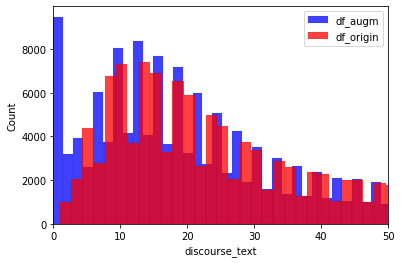

In [506]:
sns.histplot(a,color='b',label='df_augm')
sns.histplot(b,color='r',label='df_origin')
plt.legend();
plt.xlim((0,50))

__Next step : go from .txt file to working dataset for inference__

In [515]:
df_augm[(a==3)&(df_augm.discourse_type=='None')]

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,DE628D1F2F9D,1623623339861.0,301.0,316.0,ot only because,None,None 1,49 50 51
1,DE628D1F2F9D,1623617238262.0,340.0,356.0,but also because,None,None 2,56 57 58
0,41EF348E3016,1623624994574.0,118.0,133.0,"for 2 reasons,",None,None 1,20 21 22
1,C2E33FCEC470,1623626223975.0,740.0,762.0,Ending the paragraph:,None,None 2,119 120 121
6,C2E33FCEC470,1623613870490.0,2702.0,2724.0,3rd Paragraph:\n\nPoint,None,None 7,459 460 461
...,...,...,...,...,...,...,...,...
0,CD3621334165,1623629026432.0,84.0,95.0,hy is that?,None,None 1,14 15 16
0,CC27DF7CB308,1623625617424.0,368.0,382.0,"First of all,",None,None 1,70 71 72
1,0814426B27DF,1623636241984.0,267.0,284.0,Another reason is,None,None 2,52 53 54
1,4C471936CD75,1623635211392.0,845.0,860.0,nd also because,None,None 2,143 144 145
